# **Fish Weight Modeling for Market Insights**

# **Importing Libraries**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# **Loading The Dataset**

In [3]:
fish = pd.read_csv (r"C:\Users\bbuser\Desktop\NumPy\DataScience-Brain-Bytes\from_deena\data\Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# **Data Acquisition & Preparation**

## **Check for missing values**

In [4]:
print(fish.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


## **Encode categorical feature 'Species'**

In [9]:
le = LabelEncoder()
fish["Species"] = le.fit_transform(fish["Species"])

In [10]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


## **Features and target**

In [11]:
x = fish.drop(columns=["Weight"])
y = fish["Weight"]

## **Split into train and test**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Exploratory Data Analysis (EDA) & Feature Engineering**

## **Correlation heatmap**

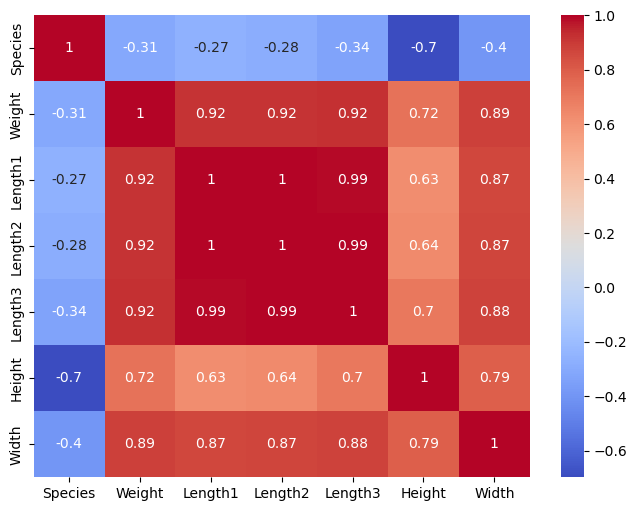

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(fish.corr(), annot=True, cmap="coolwarm")
plt.show()

## **Scatter plots: Length vs Weight, Width vs Weight**

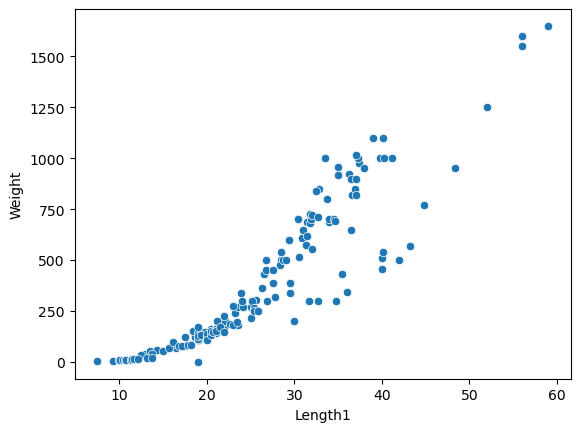

In [15]:
sns.scatterplot(x=fish["Length1"], y=fish["Weight"])
plt.show()

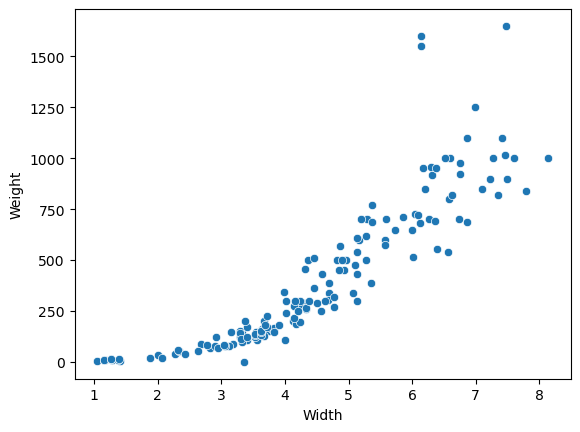

In [16]:
sns.scatterplot(x=fish["Width"], y=fish["Weight"])
plt.show()

## **Boxplot to check outliers**

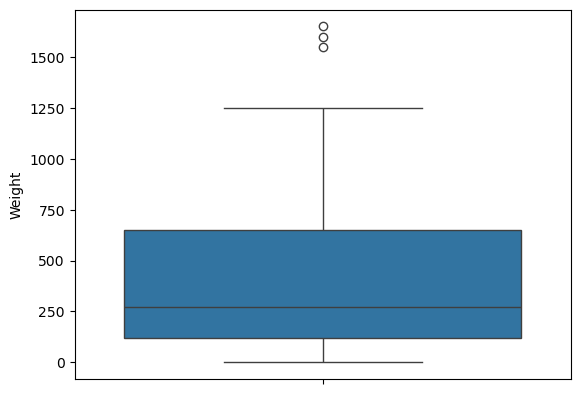

In [17]:
sns.boxplot(fish["Weight"])
plt.show()

## **Feature engineering: interaction terms**

In [18]:
fish["Length_x_Width"] = fish["Length1"] * fish["Width"]
fish["Height_x_Width"] = fish["Height"] * fish["Width"]

In [20]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width,Length_x_Width,Height_x_Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,93.26400,46.310400
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,103.33440,53.733888
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,112.23679,58.127387
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,117.17965,56.718515
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,136.05100,63.887496
...,...,...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936,16.02640,2.913181
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690,14.84730,3.083670
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558,15.19518,2.859457
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672,27.28704,5.938652


# **Model Development & Comparison**

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.01),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "R2": r2}

# Display results
results_fish = pd.DataFrame(results).T
print(results_fish)

                             RMSE        R2
Linear Regression      117.165765  0.903488
Ridge Regression       119.306851  0.899928
Lasso Regression       116.210952  0.905054
Polynomial Regression   61.714820  0.973223


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(
